Accuracy: 0.889

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Confusion matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


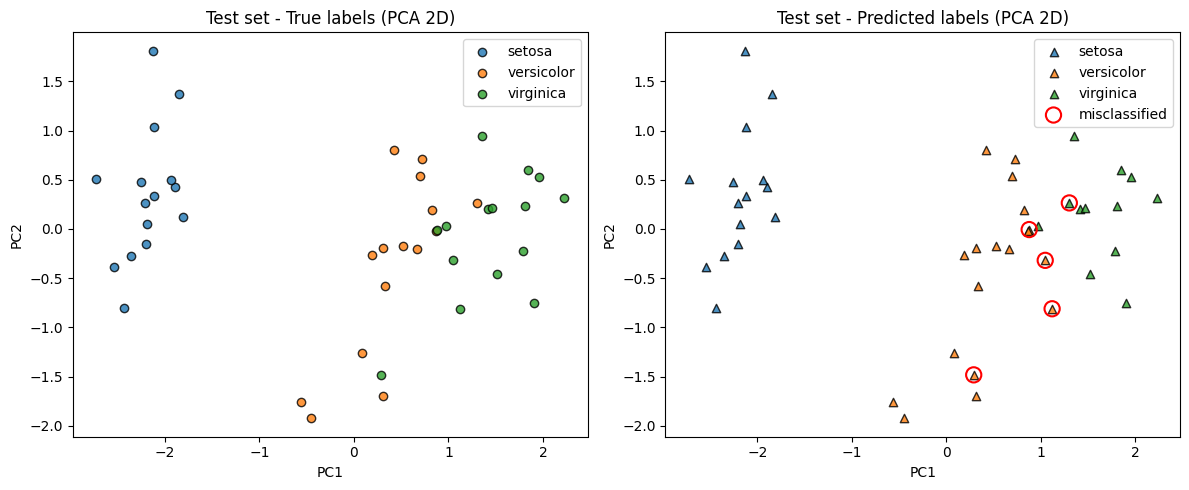

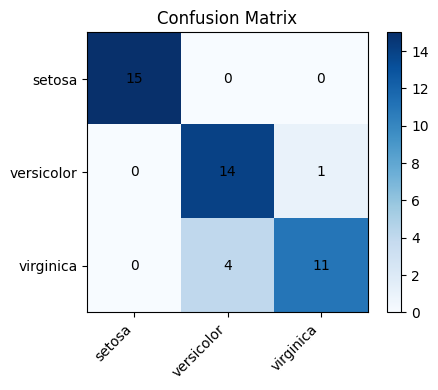

In [1]:
# demo_ml.py
# Simple ML demo: load Iris, train RandomForest, evaluate and visualize results.
# This file is suitable to run as a Jupyter cell or as a standalone script.
# ensure required packages are installed (works in notebook or as a script)
import importlib, importlib.util, subprocess, sys

deps = {"numpy": "numpy", "matplotlib": "matplotlib", "sklearn": "scikit-learn"}
missing = [pkg for mod, pkg in deps.items() if importlib.util.find_spec(mod) is None]
if missing:
    subprocess.check_call([sys.executable, "-m", "pip", "install", *missing])
    # try to import newly installed modules so subsequent code in the same session can use them
    for mod in deps.keys():
        try:
            importlib.import_module(mod)
        except Exception:
            pass
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Preprocess (scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# 5. Predict & evaluate
y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# 6. Visualize in 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# True labels
axes[0].set_title("Test set - True labels (PCA 2D)")
for cls in np.unique(y_test):
    mask = y_test == cls
    axes[0].scatter(X_test_pca[mask, 0], X_test_pca[mask, 1],
                    label=target_names[cls], edgecolor='k', alpha=0.8)
axes[0].legend()
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Predicted labels
axes[1].set_title("Test set - Predicted labels (PCA 2D)")
for cls in np.unique(y_pred):
    mask = y_pred == cls
    axes[1].scatter(X_test_pca[mask, 0], X_test_pca[mask, 1],
                    label=target_names[cls], marker='^', edgecolor='k', alpha=0.8)
# Mark misclassified points
mis = y_test != y_pred
if mis.any():
    axes[1].scatter(X_test_pca[mis, 0], X_test_pca[mis, 1],
                    facecolors='none', edgecolors='red', s=120, linewidths=1.5,
                    label='misclassified')
axes[1].legend()
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()

# 7. Optional: show confusion matrix heatmap
fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xticks(np.arange(len(target_names)))
ax.set_yticks(np.arange(len(target_names)))
ax.set_xticklabels(target_names, rotation=45, ha='right')
ax.set_yticklabels(target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()